# Riassunto di quanto fatto finora
## Regressione Logistica
Partiamo dalla regressione logistica. Importiamo il mio metodo e quello preimplementato su un paio di dataset utili.

In [1]:
from tqdm import tqdm

import numpy as np
np.random.seed(0)  # keep the random seed of numpy fixed

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from time import time

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn import datasets
from sklearn.datasets import load_wine

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.naive_bayes import GaussianNB as GNB

# Configure matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def LogisticRegressionMia(data, labels, n_iter = 1000, tol = 1e-7, insert_interc = True):
    
    # Proviamo a stampare il tempo
    # Prendiamo il tempo iniziale
    
    t0 = time()
    
    data_work = data
    
    # Per prima cosa aggiungiamo la colonna per l'intercetta
    if insert_interc:
        data_work = np.insert(data_work, 0, 1, axis = 1)
    
    # Inizialmente proviamo a fissare beta = 0
    beta = np.zeros(len(data_work[0, :]))
    beta_store = [0]
    #print(beta)
    
    # Poi dobbiamo creare il vettore di fitted probabilities p
    p = np.ones(len(labels))
    diagonale = np.zeros(len(labels))
    
    # Ora dobbiamo ripetere queste operazione
    for n in range(n_iter):
        
        # Usiamo i cicli for e poi vediamo di passare allo slicing
        for i in range(len(labels)):
            h = beta @ data_work[i, :]
            elemento = ((np.e)**h) / (1+(np.e)**h)
            #print(elemento)
            #print(np.e**h / (1+np.e**h))
            p[i] = elemento
            #print(p[i])
            diagonale[i] = p[i]*(1 - p[i])
        
        #diagonale[:] = p[:]*(1 - p[:])
            
        #print(p)

        # Ora creiamo la matrice W: questa è una prima implementazione grezza,
        # vedi coem creare le matrici diagonali
        W = np.diagflat(diagonale)
        #print(W)

        # A questo punto definisco il vettore z
        W_inv = np.linalg.inv(W)
        z = np.dot(data_work, beta) + np.dot(W_inv, labels-p)

        # Ora calcolo il nuovo b
        a = np.dot(data_work.T, W)
        c = np.dot(a, data_work)
        d = np.linalg.inv(c)
        f = np.dot(data_work.T, W)
        g = np.dot(d, f)
        beta = np.dot(g, z)
        
        beta_store.append(beta)
        
        if (np.linalg.norm(beta_store[-1] - beta_store[-2]) < tol):
            break
    
    print(f"Regressione effettuata in: {time() - t0} s.")
        
    return beta

In [3]:
def compara_lr(data, labels, data_val = None, y_val = None, n_iter = 1000, tol = 1e-7, 
               insert_interc = True, solver = 'newton-cholesky', penalty = None):
    
    beta = LogisticRegressionMia(data, labels, n_iter, tol, insert_interc)
    print(f"I coefficienti della mia regressione lineare sono dati da: {beta}")
    
    t0 = time()
    logreg = LogisticRegression(solver = solver, penalty = penalty).fit(data, labels)
    
    print(f"La regressione logistica preimplementata è stata eseguita in: {time() - t0} s")
    
    coef_logreg = []
    coef_logreg.append(logreg.intercept_[0])
    for i in range(len(logreg.coef_[0])):
        coef_logreg.append(logreg.coef_[0, i])
    
    print(f"I coefficienti della regressione lineare preimplementata sono dati da: {coef_logreg}")
    
    return beta, coef_logreg



In [4]:
# Funzione per predirre la classe, nel caso di due classi

def predict(data, coef_model, soglia = 0.5, insert_interc = True):
    
    t0 = time()
    
    predict = []
    len_feature = len(data[0])
    data_work = data
    
    if insert_interc:
        data_work = data_work = np.insert(data_work, 0, 1, axis = 1)
        
    # Facciamo un ciclo sui dati che possediamo
    
    for i in range(len(data_work)):
        scalare = np.inner(data_work[i], coef_model)
        prob = np.e**(scalare) / (1 + np.e**(scalare))
        
        if (prob <= soglia):
            predict.append(0)
        else:
            predict.append(1)
    
    print(f"Predizione mia effettuata in: {time() - t0} s.")
    
    return predict

In [5]:
# Compariamo le accuratezze

def calcola_acc_mia(data, pred_real, coef_model, soglia = 0.5, insert_interc = True):
    
    y_pred_mia = predict(data, coef_model, soglia = 0.5, insert_interc = True)
    acc_mia = accuracy_score(pred_real, y_pred_mia)
    
    print(f"Accuratezza della mia predizione: {acc_mia}")
    

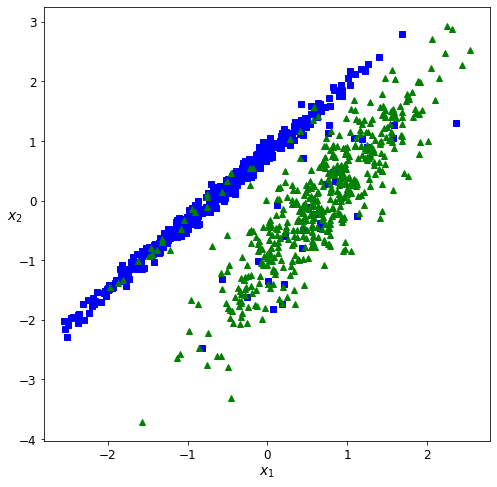

In [6]:
X_cluster, y_cluster = datasets.make_classification(n_samples=1000,
                                                    n_features=2,
                                                    n_redundant=0,
                                                    n_informative=2,
                                                    n_repeated=0,
                                                    n_clusters_per_class=1,
                                                    flip_y=0.1,
                                                    random_state=15,
                                                    )
# scale the data
scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_cluster)

plt.figure(figsize=(8, 8))
plt.plot(X_cluster[:, 0][y_cluster == 0], X_cluster[:, 1][y_cluster == 0], "bs")
plt.plot(X_cluster[:, 0][y_cluster == 1], X_cluster[:, 1][y_cluster == 1], "g^")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
plt.show()

In [7]:
# Per prima cosa dividiamo in training e validation set

X_cluster_train, X_cluster_val, y_cluster_train, y_cluster_val = train_test_split(X_cluster,
                                                                                  y_cluster, 
                                                                                  train_size = 0.7)

beta_cluster, coef_cluster = compara_lr(X_cluster_train, y_cluster_train)

Regressione effettuata in: 0.11675667762756348 s.
I coefficienti della mia regressione lineare sono dati da: [ 0.23859315  3.86576226 -2.79345758]
La regressione logistica preimplementata è stata eseguita in: 0.0023279190063476562 s
I coefficienti della regressione lineare preimplementata sono dati da: [0.23858910199228564, 3.8657556025013182, -2.7934507622780633]


Direi che i risultati sono molto buoni. Proviamo ora a vedere come è l'accuratezza. Dovrei scrivere una funzione che assegna a ognuno dei dati il label corretto.

In [8]:
calcola_acc_mia(X_cluster_val, y_cluster_val, beta_cluster)

logreg_cluster = LogisticRegression(solver = 'newton-cholesky', penalty = None).fit(X_cluster_train, y_cluster_train)
y_cluster_pred = logreg_cluster.predict(X_cluster_val)
acc_cluster = accuracy_score(y_cluster_val, y_cluster_pred)
print(f"Accuratezza della predizione preimplementata: {acc_cluster}")

Predizione mia effettuata in: 0.0010709762573242188 s.
Accuratezza della mia predizione: 0.9433333333333334
Accuratezza della predizione preimplementata: 0.9433333333333334
